### VADER Sentiment Analysis Tool
In this code, the sentiment analysis tool known as VADER (Valence Aware Dictionary and sEntiment Reasoner) is used to analyze text responses from a survey. This tool is specifically designed to handle short texts.

The code applies VADER to analyze participants' responses to a question about how they feel when comparing their lives to others on social media. The goal of this analysis is to classify each response into categories like "Positive," "Negative," or "Neutral," which helps to understand the emotional patterns of the users. Additionally, responses that contain only random symbols or dots are categorized as "Not Expressive" since they do not clearly convey any emotion.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sra28\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Analysis completed. Data saved to social_analyzed.csv.
    the age:   Gender:   Area: Current educational level: marital status:  \
0      13-17  feminine  Riyadh  High school or equivalent        bachelor   
1      18-24      male  Riyadh          Bachelor's degree        bachelor   
2      18-24  feminine  Riyadh          Bachelor's degree        bachelor   
3      18-24  feminine  Riyadh  High school or equivalent        bachelor   
4      35-44  feminine  Riyadh          Bachelor's degree         married   
..       ...       ...     ...                        ...             ...   
846    25-34      male  Riyadh  High school or equivalent        bachelor   
847    18-24  feminine    Abha          Bachelor's degree        bachelor   
848    18-24      male   Jazan          Bachelor's degree        bachelor   
849    18-24      male  Riyadh          Bachelor's degree        bachelor   
850    18-24      male  Riyadh          Bachelor's degree        bachelor   

        Employment s

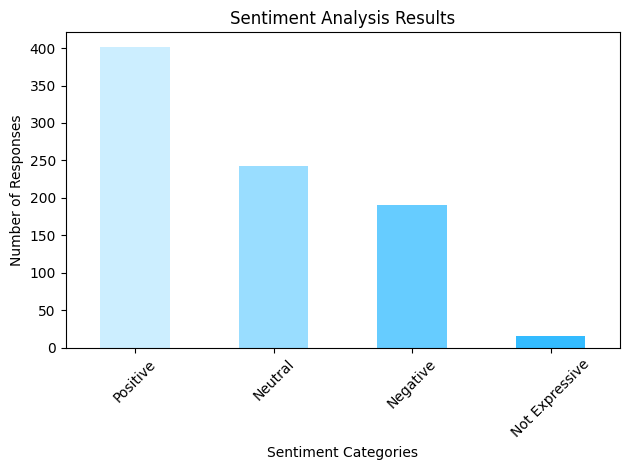

In [15]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
import re
import matplotlib.pyplot as plt

# Ensure the necessary library for sentiment analysis is downloaded
nltk.download('vader_lexicon')

df = pd.read_csv('SurveyData.csv', encoding='latin1')

if 'How do you feel when you compare your life to the lives of others on social media?' in df.columns:
    sia = SentimentIntensityAnalyzer()

    # Define a function to check for meaningless texts
    def is_meaningless(text):
        return bool(re.match(r'^\W*$', text.strip()))

    # Categorize sentiments into Positive, Negative, or Neutral, or Not Expressive for meaningless texts
    def categorize_sentiment(text):
        if is_meaningless(text):
            return 'Not Expressive'
        else:
            score = sia.polarity_scores(text)['compound']
            if score > 0.05:
                return 'Positive'
            elif score < -0.05:
                return 'Negative'
            else:
                return 'Neutral'

    # Modify the original column to contain the sentiment result instead of the original text
    df['Sentiment'] = df['How do you feel when you compare your life to the lives of others on social media?'].apply(categorize_sentiment)


    df.to_csv('social_analyzed.csv', index=False)

    print("Analysis completed. Data saved to social_analyzed.csv.")
    print(df)


    sentiment_counts = df['Sentiment'].value_counts()
    colors = ['#cceeff', '#99ddff', '#66ccff', '#33bbff']
    sentiment_counts.plot(kind='bar', color=colors)
    plt.title('Sentiment Analysis Results')
    plt.xlabel('Sentiment Categories')
    plt.ylabel('Number of Responses')
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()  
else:
    print("Column 'How do you feel when you compare your life to the lives of others on social media?' not found in the CSV file.")
